### **1. Importing Libraries**


In [1]:
%matplotlib inline

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

### **2. Loading data into a DataFrame**

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **3. Analysing Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


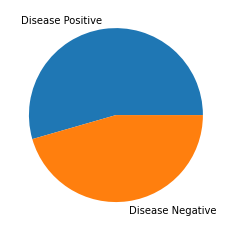

In [7]:
plt.pie(df['target'].value_counts(), labels=['Disease Positive', 'Disease Negative'])
plt.show()

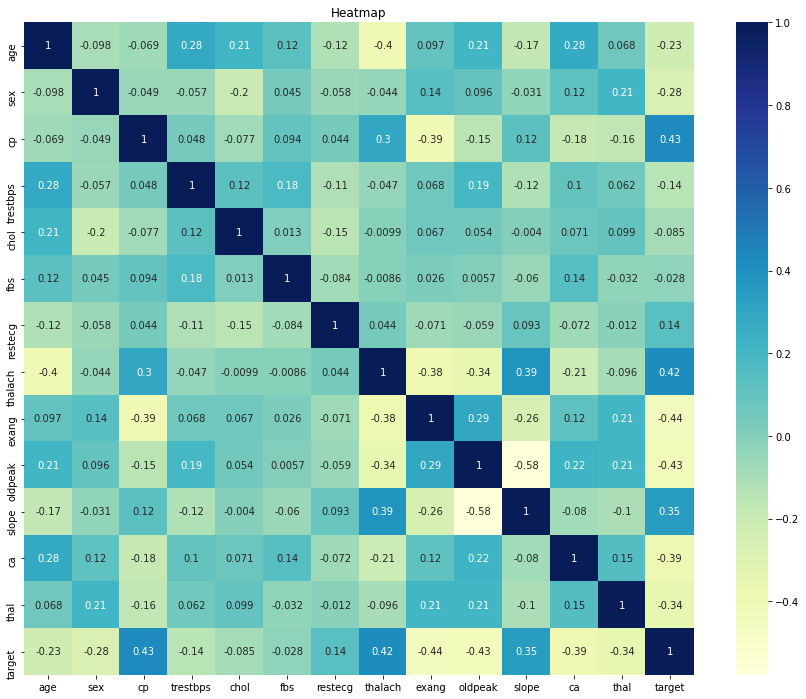

In [8]:
plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Heatmap')
plt.show()

### **4. Preprocessing Data**

In [9]:
def encode(df, cols):
    local_df = df.copy()
    for col, pre in cols.items():
        dummies = pd.get_dummies(df[col], prefix=pre)
        df = pd.concat([df, dummies] , axis=1)
        df = df.drop(col, axis=1)
    return df

In [10]:
local_df = df.copy()

features = ['cp', 'thal', 'exang']
local_df = encode(local_df, dict(zip(features, ['CP','TH', 'EX'])))

X = local_df.drop('target', axis=1).copy()
y = local_df['target'].copy()

In [11]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [12]:
X

,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,CP_0,CP_1,CP_2,CP_3,TH_0,TH_1,TH_2,TH_3,EX_0,EX_1
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-0.945384,-0.444554,-0.634648,3.489114,-0.081514,3.979112,-1.100763,-0.793116,0.696631,-0.696631
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.945384,-0.444554,1.575677,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,0.696631,-0.696631
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,0.696631,-0.696631
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,0.696631,-0.696631
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,-0.379244,0.976352,-0.714429,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-1.435481,1.435481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,0.478391,-0.101730,-0.417635,0.898962,-1.165281,-0.724323,-0.649113,-0.714429,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,-1.100763,1.260850,-1.435481,1.435481
299,-1.033002,0.681005,-1.234996,0.342756,-0.417635,0.898962,-0.771706,0.138373,-0.649113,-0.714429,-0.945384,-0.444554,-0.634648,3.489114,-0.081514,-0.251312,-1.100763,1.260850,0.696631,-0.696631
300,1.503641,0.681005,0.706843,-1.029353,2.394438,0.898962,-0.378132,2.036303,-0.649113,1.244593,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,-1.100763,1.260850,0.696631,-0.696631
301,0.290464,0.681005,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,0.138373,-0.649113,0.265082,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,-1.100763,1.260850,-1.435481,1.435481


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### **Training**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

K Nearest Neighbours Accuracy - 90.1639344262295


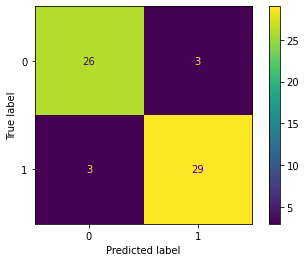

In [19]:
k_near_model = KNeighborsClassifier()
k_near_model.fit(X_train, y_train)

print("K Nearest Neighbours Accuracy - " + str(k_near_model.score(X_test, y_test) * 100))
plot_confusion_matrix(k_near_model, X_test, y_test)

Logistic Regression Model Accuracy - 88.52459016393442


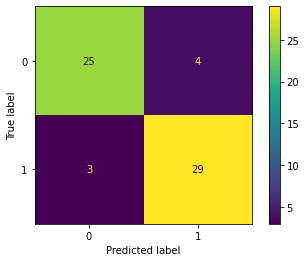

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression Model Accuracy - " + str(lr_model.score(X_test, y_test) * 100))
plot_confusion_matrix(lr_model, X_test, y_test)

SVM Model Accuracy - 91.80327868852459


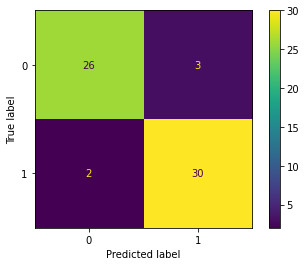

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("SVM Model Accuracy - " + str(svm_model.score(X_test, y_test) * 100))
plot_confusion_matrix(svm_model, X_test, y_test)